In [1]:
using Plots

In [3]:
edit(Animation)

[1] Animation(dir::String, frames::Vector{String}) @ Plots ~/.julia/packages/Plots/du2dt/src/animation.jl:12
[2] Animation(dir, frames) @ Plots ~/.julia/packages/Plots/du2dt/src/animation.jl:12
[3] Animation() @ Plots ~/.julia/packages/Plots/du2dt/src/animation.jl:16
[4] Animation(dir) @ Plots ~/.julia/packages/Plots/du2dt/src/animation.jl:16

In [ ]:
using Plots
# define the Lorenz attractor
Base.@kwdef mutable struct Lorenz
    dt::Float64 = 0.02
    σ::Float64 = 10
    ρ::Float64 = 28
    β::Float64 = 8/3
    x::Float64 = 1
    y::Float64 = 1
    z::Float64 = 1
end

function step!(l::Lorenz)
    dx = l.σ * (l.y - l.x)
    dy = l.x * (l.ρ - l.z) - l.y
    dz = l.x * l.y - l.β * l.z
    l.x += l.dt * dx
    l.y += l.dt * dy
    l.z += l.dt * dz
end

attractor = Lorenz()




In [1]:
using Plots,OrdinaryDiffEq

G = 9.8      # acceleration due to gravity, in m/s^2
L1 = 1.0     # length of pendulum 1 in m
L2 = 1.0     # length of pendulum 2 in m
L = L1 + L2  # maximal length of the combined pendulum
M1 = 1.0     # mass of pendulum 1 in kg
M2 = 1.0     # mass of pendulum 2 in kg
t_stop = 5   # how many seconds to simulate

function pendulum!(du, u, p, t)
    (; M1, M2, L1, L2, G) = p

    du[1] = u[2]

    delta = u[3] - u[1]
    den1 = (M1 + M2) * L1 - M2 * L1 * cos(delta) * cos(delta)
    du[2] = (
        (
            M2 * L1 * u[2] * u[2] * sin(delta) * cos(delta) +
            M2 * G * sin(u[3]) * cos(delta) +
            M2 * L2 * u[4] * u[4] * sin(delta) - (M1 + M2) * G * sin(u[1])
        ) / den1
    )

    du[3] = u[4]

    den2 = (L2 / L1) * den1
    du[4] = (
        (
            -M2 * L2 * u[4] * u[4] * sin(delta) * cos(delta) +
            (M1 + M2) * G * sin(u[1]) * cos(delta) -
            (M1 + M2) * L1 * u[2] * u[2] * sin(delta) - (M1 + M2) * G * sin(u[3])
        ) / den2
    )
    nothing
end


pendulum! (generic function with 1 method)

[ Info: Saved animation to /Users/emueller/Documents/Work Laptop 2011-2012/PHYS 4480-7680 Computational Physics/lectures/tmp.gif


Plots.AnimatedGif("/Users/emueller/Documents/Work Laptop 2011-2012/PHYS 4480-7680 Computational Physics/lectures/tmp.gif")
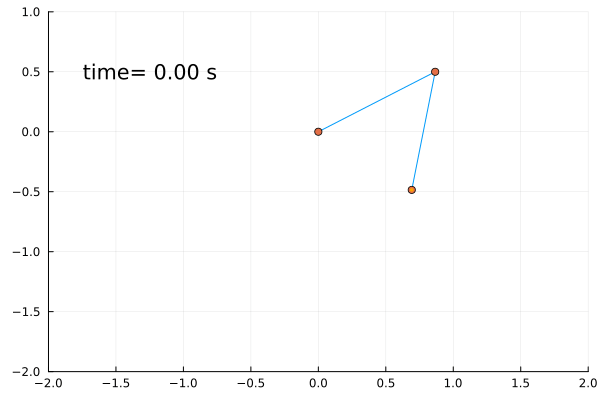

In [2]:
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

p = (; M1, M2, L1, L2, G)
prob = ODEProblem(pendulum!, deg2rad.([th1, w1, th2, w2]), (0.0, t_stop), p)
sol = solve(prob, Tsit5())

x1 = +L1 * sin.(sol[1, :])
y1 = -L1 * cos.(sol[1, :])

x2 = +L2 * sin.(sol[3, :]) + x1
y2 = -L2 * cos.(sol[3, :]) + y1

using Plots
gr()
anim = @animate for i in eachindex(x2)

    x = [0, x1[i], x2[i]]
    y = [0, y1[i], y2[i]]

    plot(x, y, legend = false)
    plot!(xlims = (-2, 2), xticks = -2:0.5:2)
    plot!(ylims = (-2, 1), yticks = -2:0.5:1)
    scatter!(x, y)

    x = x2[1:i]
    y = y2[1:i]

    plot!(x, y, linecolor = :orange)
    plot!(xlims = (-2, 2), xticks = -2:0.5:2)
    plot!(ylims = (-2, 1), yticks = -2:0.5:1)
    scatter!(
        x,
        y,
        color = :orange,
        markersize = 2,
        markerstrokewidth = 0,
        markerstrokecolor = :orange,
    )
    annotate!(-1.25, 0.5, "time= $(rpad(round(sol.t[i]; digits=2),4,"0")) s")
end
gif(anim, fps = 10)


In [4]:
import Pkg; Pkg.add("PlotlyJS")

   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [f0f68f2c] + PlotlyJS v0.18.13
    Updating `~/.julia/environments/v1.10/Manifest.toml`
  [ad839575] + Blink v0.12.9
  [9fb69e20] + Hiccup v0.2.2
  [50d2b5c4] + Lazy v0.15.1
  [ffc61752] + Mustache v1.0.19
  [a975b10e] + Mux v1.0.2
  [a03496cd] + PlotlyBase v0.8.19
  [f0f68f2c] + PlotlyJS v0.18.13
  [f2990250] + PlotlyKaleido v2.2.4
  [f7e6163d] + Kaleido_jll v0.2.1+0
Precompiling project...
  ✓ Kaleido_jll
  ✓ Hiccup
  ✓ Mustache
  ✓ Lazy
  ✓ PlotlyKaleido
  ✓ Mux
  ✓ PlotlyBase
  ✓ Blink
  ✓ PlotlyJS
  ✓ PlotlyJS → IJuliaExt
  10 dependencies successfully precompiled in 7 seconds. 524 already precompiled.


In [6]:
?range

search: range LinRange UnitRange StepRange StepRangeLen trailing_zeros



```
range(start, stop, length)
range(start, stop; length, step)
range(start; length, stop, step)
range(;start, length, stop, step)
```

Construct a specialized array with evenly spaced elements and optimized storage (an [`AbstractRange`](@ref)) from the arguments. Mathematically a range is uniquely determined by any three of `start`, `step`, `stop` and `length`. Valid invocations of range are:

  * Call `range` with any three of `start`, `step`, `stop`, `length`.
  * Call `range` with two of `start`, `stop`, `length`. In this case `step` will be assumed to be one. If both arguments are Integers, a [`UnitRange`](@ref) will be returned.
  * Call `range` with one of `stop` or `length`. `start` and `step` will be assumed to be one.

See Extended Help for additional details on the returned type.

# Examples

```jldoctest
julia> range(1, length=100)
1:100

julia> range(1, stop=100)
1:100

julia> range(1, step=5, length=100)
1:5:496

julia> range(1, step=5, stop=100)
1:5:96

julia> range(1, 10, length=101)
1.0:0.09:10.0

julia> range(1, 100, step=5)
1:5:96

julia> range(stop=10, length=5)
6:10

julia> range(stop=10, step=1, length=5)
6:1:10

julia> range(start=1, step=1, stop=10)
1:1:10

julia> range(; length = 10)
Base.OneTo(10)

julia> range(; stop = 6)
Base.OneTo(6)

julia> range(; stop = 6.5)
1.0:1.0:6.0
```

If `length` is not specified and `stop - start` is not an integer multiple of `step`, a range that ends before `stop` will be produced.

```jldoctest
julia> range(1, 3.5, step=2)
1.0:2.0:3.0
```

Special care is taken to ensure intermediate values are computed rationally. To avoid this induced overhead, see the [`LinRange`](@ref) constructor.

!!! compat "Julia 1.1"
    `stop` as a positional argument requires at least Julia 1.1.


!!! compat "Julia 1.7"
    The versions without keyword arguments and `start` as a keyword argument require at least Julia 1.7.


!!! compat "Julia 1.8"
    The versions with `stop` as a sole keyword argument, or `length` as a sole keyword argument require at least Julia 1.8.


---

```
range(start::T; stop::T, length=100) where T<:Colorant
range(start::T, stop::T; length=100) where T<:Colorant
```

Generates N (=`length`) >2 colors in a linearly interpolated ramp from `start` to`stop`, inclusive, returning an `Array` of colors.

!!! compat "Julia 1.1"
    `stop` as a positional argument requires at least Julia 1.1.


---

REPL.Message("Extended help is available with `??`", (color = :cyan, bold = true))


In [1]:
1+1

2

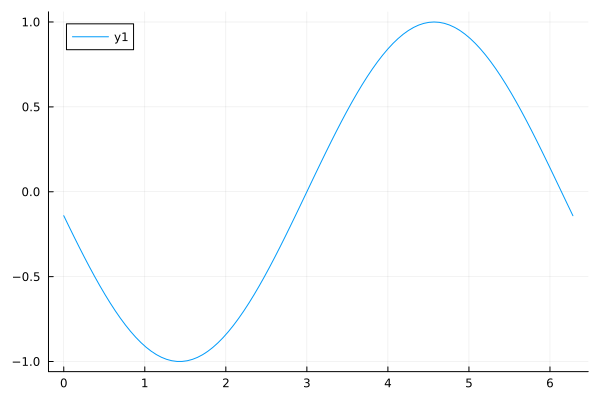

In [3]:
using Plots
#Plots.plotlyjs()
x = range(0, 2*pi, 100) |> collect 
dt, nsteps = 0.03, 100
for n = 1:nsteps
    IJulia.clear_output(true)
    Plots.plot(x, sin.(x .- n*dt))  |> display
end

In [ ]:
# initialize a 3D plot with 1 empty series
plt = plot3d(
    1,
    xlim = (-30, 30),
    ylim = (-30, 30),
    zlim = (0, 60),
    title = "Lorenz Attractor",
    legend = false,
    marker = 2,
)

# build an animated gif by pushing new points to the plot, saving every 10th frame
@gif for i=1:1500
    step!(attractor)
    push!(plt, attractor.x, attractor.y, attractor.z)
end every 10

In [4]:
using Plots

@userplot CirclePlot

circleplot! (generic function with 2 methods)

In [6]:
?circleplot

search: circleplot! circleplot CirclePlot



No documentation found.

`circleplot!` is a `Function`.

```
# 2 methods for generic function "circleplot!" from Main:
 [1] circleplot!(plt::RecipesBase.AbstractPlot, args...; kw...)
     @ ~/.julia/packages/RecipesBase/BRe07/src/RecipesBase.jl:384
 [2] circleplot!(args...; kw...)
     @ ~/.julia/packages/RecipesBase/BRe07/src/RecipesBase.jl:382
```


In [2]:
using GLMakie

Precompiling GLMakie
  ✓ GLMakie
  1 dependency successfully precompiled in 27 seconds. 247 already precompiled.


In [3]:
using GLMakie

Base.@kwdef mutable struct Lorenz
    dt::Float64 = 0.01
    σ::Float64 = 10
    ρ::Float64 = 28
    β::Float64 = 8/3
    x::Float64 = 1
    y::Float64 = 1
    z::Float64 = 1
end

function step!(l::Lorenz)
    dx = l.σ * (l.y - l.x)
    dy = l.x * (l.ρ - l.z) - l.y
    dz = l.x * l.y - l.β * l.z
    l.x += l.dt * dx
    l.y += l.dt * dy
    l.z += l.dt * dz
    Point3f(l.x, l.y, l.z)
end

attractor = Lorenz()

points = Observable(Point3f[])
colors = Observable(Int[])

set_theme!(theme_black())

fig, ax, l = lines(points, color = colors,
    colormap = :inferno, transparency = true,
    axis = (; type = Axis3, protrusions = (0, 0, 0, 0),
              viewmode = :fit, limits = (-30, 30, -30, 30, 0, 50)))

display(fig)

record(fig, "lorenz.mp4", 1:120) do frame
    for i in 1:50
        push!(points[], step!(attractor))
        push!(colors[], frame)
    end
    ax.azimuth[] = 1.7pi + 0.3 * sin(2pi * frame / 120)
    notify(points)
    notify(colors)
    l.colorrange = (0, frame)
end

"lorenz.mp4"

In [ ]:
f = Figure()
Axis(f[1, 1], limits = (0, 1, 0, 1))

rs_h = IntervalSlider(f[2, 1], range = LinRange(0, 1, 1000),
    startvalues = (0.2, 0.8))
rs_v = IntervalSlider(f[1, 2], range = LinRange(0, 1, 1000),
    startvalues = (0.4, 0.9), horizontal = false)

labeltext1 = lift(rs_h.interval) do int
    string(round.(int, digits = 2))
end
Label(f[3, 1], labeltext1, tellwidth = false)
labeltext2 = lift(rs_v.interval) do int
    string(round.(int, digits = 2))
end
Label(f[1, 3], labeltext2,
    tellheight = false, rotation = pi/2)

points = rand(Point2f, 300)

# color points differently if they are within the two intervals
colors = lift(rs_h.interval, rs_v.interval) do h_int, v_int
    map(points) do p
        (h_int[1] < p[1] < h_int[2]) && (v_int[1] < p[2] < v_int[2])
    end
end

scatter!(points, color = colors, colormap = [:black, :orange], strokewidth = 0)

display(f)

In [ ]:
display(f)

In [ ]:
scene = Scene()
cam3d!(scene)
sphere_plot = mesh!(scene, Sphere(Point3f(0), 0.5), color=:red)
scale!(scene, 0.5, 0.5, 0.5)
rotate!(scene, Vec3f(1, 0, 0), 0.5) # 0.5 rad around the y axis
scene

In [ ]:
translate!(sphere_plot, Vec3f(0, 0, 1))
scene

In [ ]:
points = Observable(Point2f[randn(2)])

fig, ax = scatter(points)
limits!(ax, -4, 4, -4, 4)

fps = 60
nframes = 120

display(fig)

for i = 1:nframes
    new_point = Point2f(randn(2))
    points[] = push!(points[], new_point)
    sleep(1/fps) # refreshes the display!
end

In [ ]:
# In another code not shown here, I've:
# - computed solution of double pendulum problem
# - extracted independent variables θ₁, θ₂ from solution

N = length(θ₁)
# plot configuration space, i.e. a torus
Θ₁ = -π:0.01:π
Θ₂ = -π:0.01:π
X_torus = [(1 + cos(Θ₂ᵢ)) * cos(Θ₁ᵢ) for Θ₁ᵢ in Θ₁, Θ₂ᵢ in Θ₂]
Y_torus = [(1 + cos(Θ₂ᵢ)) * sin(Θ₁ᵢ) for Θ₁ᵢ in Θ₁, Θ₂ᵢ in Θ₂]
Z_torus = [sin(Θ₂ᵢ) for Θ₁ᵢ in Θ₁, Θ₂ᵢ in Θ₂]
p₂ = surface(X_torus, Y_torus, Z_torus, colorbar = :none, legend = false, xlims = [-2, 2], ylims = [-2, 2], zlims = [-2, 2])
# create gif
anim = @animate for i = 2:200:N
  # plot first pendulum
  i_ = max(1, i-1000)
  x1 = @. cos(θ₁[i_:i] - π/2)
  y1 = @. sin(θ₁[i_:i] - π/2)
  x₁ = x1[end]
  y₁ = y1[end]
  α = range(0.0, 1.0, length = length(x1))
  p₁ = plot(x1, y1, α = α, color = 1, legend = false, xlims = [-2, 2], ylims = [-2, 2])
  # plot second pendulum
  x2 = @. x1 + cos(θ₂[i_:i] - π/2)
  y2 = @. y1 + sin(θ₂[i_:i] - π/2)
  x₂ = x2[end]
  y₂ = y2[end]
  plot!(p₁, x2, y2, color = 3, α = α, xlabel = L"x", ylabel = L"y")
  plot!(p₁, [0; x₁], [0; y₁], linewidth = 3, color = :black)
  plot!(p₁, [x₁; x₂], [y₁; y₂], linewidth = 3, color = :black)
  scatter!(p₁, (0, 0), markersize = 5, markercolor = :black)
  scatter!(p₁, (x₁, y₁), markersize = 5, markercolor = 1)
  scatter!(p₁, (x₂, y₂), markersize = 5, markercolor = 3)
  # get torus' plot
  p₃ = deepcopy(p₂)
  # plot path of representative particle in configuration space
  X = @. (1 + cos(θ₁[i_:i])) * cos(θ₂[i_:i])
  Y = @. (1 + cos(θ₁[i_:i])) * sin(θ₂[i_:i])
  Z = @. sin(θ₁[i_:i])
  plot!(p₃, X, Y, Z, color = :black)
  scatter!(p₃, (X[end], Y[end], Z[end]), markersize = 5, markercolor = :black)
  plot(p₁, p₃, size = (600, 300))
end
gif(anim, "double-pendulum.gif")

In [8]:
import Pkg; Pkg.add("OrdinaryDiffEq")

   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [1dea7af3] + OrdinaryDiffEq v6.85.0
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [7]:
# # Making animated and interactive scientific 
# # visualizations in Makie.jl

# Alrighty, in this short tutorial I'll teach you how to make
# animated scientific such as this video, or this application.

# Prerequisitives:
# * Basic familiarity with Julia (obviously)
# * Basic familiarity with Makie.jl

# # The process
# 0. Learn about `Observable`s
# 1. Initialize simulation in a stepping manner
# 2. Initialize the `Observable`s of the animation 
# 3. Plot the `Observable`s and any other static elements
# 4. Create the "animation stepping function"
# 5. Test it
# 6. Save animations to videos
# 7. Interactive application

# Let's start!
# Load packages that will be used
using DynamicalSystems
using OrdinaryDiffEq
using GLMakie
using DataStructures: CircularBuffer

# %% 0. Learn about `Observable`s
# An `Observable` is a mutable container of an object of type `T`.
# `T` can be any type. The value of an `Observable` can then be 
# changed on the spot, just like updating any mutable container.
# (This is similar to the base structure `Ref`, if you're familiar)

# The important part here is that `Observable`s can be "listened" to.
# What does this mean...?

o = Observable(1) # Observable with values of type `Int`

l1 = on(o) do val # Create a listener `l1` of observable.
    println("Observable now has value $val")
end



LoadError: ArgumentError: Package OrdinaryDiffEq not found in current path.
- Run `import Pkg; Pkg.add("OrdinaryDiffEq")` to install the OrdinaryDiffEq package.

In [ ]:
# `l1` is triggered each time the value of `o` is updated.
# (demo in REPL, set `o[] = 2`.)


# We care about `Observable`s because Makie.jl is hooked up
# to this "listener" system. If any plotted element is
# initialized as an observable, then Makie.jl understands this.
# Updating the observable would update the plot values.

# For example:
ox = 1:4
oy = Observable(rand(4))
lw = Observable(2)

fig, ax = lines(ox, oy; linewidth = lw)
ylims!(ax, 0, 1)

lw[] = 50
oy[] = rand(4)

# This simple process is the basis of creating 
# both animations, as well as interactive apps with Makie.jl.
# So in the following let's begin making a simple visualization
# and interactive application of the double pendulum


# %% 1. Initialize simulation in a stepping manner
# (this can also be done with a pre-run simulation)
# the goal is to create a "step" function which
# once called it progresses the data for one animation frame
const L1 = 1.0
const L2 = 0.9
M = 2
u0 = [π/3, 0, 3π/4, -2]
dp = Systems.double_pendulum(u0; L1, L2)

# Solve diffeq with constant step for smoother curves
diffeq = (alg = Tsit5(), adaptive = false, dt = 0.005)

integ = dp.integ

function xycoords(state)
    θ1 = state[1]
    θ2 = state[3]
    x1 = L1 * sin(θ1)
    y1 = -L1 * cos(θ1)
    x2 = x1 + L2 * sin(θ2)
    y2 = y1 - L2 * cos(θ2)
    return x1,x2,y1,y2
end

# `integ` is an integrator. `step!(integ)` progresses the integrator
# for one step. `integ.u` is the system state at current step. 
# Then `xycoords` converts the states of the integrator
# to their plottable format. So we can imagine something like 
function progress_for_one_step!(integ)
    step!(integ)
    return xycoords(integ)
end
# to be our stepping function that returns the new data.

# If we had finite data instead of a forever-running animation, 
# then the "stepping function" would simply be to progress the index `i`
# of the existing data one step forwards...


# %% 2. Initialize the `Observable`s of the animation 
# You need to think of this in advance: what things will to be 
# animated, and what other plotting elements will be static? 
# Animated elements will need to become `Observable`s.

# Here the animated elements will be: balls and rods making the
# double pendulum, and the tail (trajectory) of the pendulum.
x1,x2,y1,y2 = xycoords(u0)
rod   = Observable([Point2f(0, 0), Point2f(x1, y1), Point2f(x2, y2)])
balls = Observable([Point2f(x1, y1), Point2f(x2, y2)])
# (Remember: the most optimal way to plot 2D things in Makie.jl is to
# give it a vector of `Point2f`, the coordinates for the plot)

# Here we have initialized two _different_ observables, because
# rods and balls will be plotted in a different manner (lines/scatter)

# Next is the observable for the tail
tail = 300 # length of plotted trajectory, in units of `dt`
# The circular buffer datastructure makes making stepping-based
# animations very intuitive
traj = CircularBuffer{Point2f}(tail)
fill!(traj, Point2f(x2, y2)) # add correct values to the circular buffer
traj = Observable(traj) # make it an observable


# %% 3. Plot the `Observable`s and any other static elements
# Before plotting we need to initialie a figure
fig = Figure(); display(fig)
# in my experience it leads to cleaner code if we first initialize 
# an axis and populate it accordingly.
ax = Axis(fig[1,1])

# Now we plot the observables _directly_! First the pendulum
lines!(ax, rod; linewidth = 4, color = :purple)
scatter!(ax, balls; marker = :circle, strokewidth = 2, 
    strokecolor = :purple,
    color = :black, markersize = [8, 12]
)

# then its trajectory, with a nice fadeout color
c = to_color(:purple)
tailcol = [RGBAf(c.r, c.g, c.b, (i/tail)^2) for i in 1:tail]
lines!(ax, traj; linewidth = 3, color = tailcol)

# We can also plot now any other static elements
ax.title = "double pendulum"
ax.aspect = DataAspect()
l = 1.05(L1+L2)
xlims!(ax, -l, l)
ylims!(ax, -l, 0.5l)

# %% 4. Create the "animation stepping function"
# Using the functions of step 1, we now define a function
# that updates the observables. Makie.jl understands observable
# updates and directly reflects this on the plotted elements.
function animstep!(integ, rod, balls, traj)
    x1,x2,y1,y2 = progress_for_one_step!(integ)
    rod[] = [Point2f(0, 0), Point2f(x1, y1), Point2f(x2, y2)]
    balls[] = [Point2f(x1, y1), Point2f(x2, y2)]
    push!(traj[], Point2f(x2, y2))
    traj[] = traj[] # <- important! Updating in-place the value of an
                    # `Observable` does not trigger an update!
end

# %% 5. Test it
for i in 1:1000
    animstep!(integ, rod, balls, traj)
    sleep(0.001)
end

# cool it works. Let's wrap up the creation of the observables
# and plots in a function (just to re-initialie everything)
function makefig(u0)
    dp = Systems.double_pendulum(u0; L1, L2)
    integ = dp.integ
    x1,x2,y1,y2 = xycoords(u0)
    rod   = Observable([Point2f(0, 0), Point2f(x1, y1), Point2f(x2, y2)])
    balls = Observable([Point2f(x1, y1), Point2f(x2, y2)])
    traj = CircularBuffer{Point2f}(tail)
    fill!(traj, Point2f(x2, y2)) # add correct values to the circular buffer
    traj = Observable(traj) # make it an observable
    fig = Figure(); display(fig)
    ax = Axis(fig[1,1])
    lines!(ax, rod; linewidth = 4, color = :purple)
    scatter!(ax, balls; marker = :circle, strokewidth = 2, 
        strokecolor = :purple,
        color = :black, markersize = [8, 12]
    )
    lines!(ax, traj; linewidth = 3, color = tailcol)
    ax.title = "double pendulum"
    ax.aspect = DataAspect()
    l = 1.05(L1+L2)
    xlims!(ax, -l, l)
    ylims!(ax, -l, 0.5l)
    # also return the figure object, we'll ues it!
    return fig, integ, rod, balls, traj
end
    
# %% 6. Save animations to videos
fig, integ, rod, balls, traj = makefig(u0)
frames = 1:200
record(fig, "video.mp4", frames; framerate = 60) do i # i = frame number
    for j in 1:5 # step 5 times per frame
        animstep!(integ, rod, balls, traj)
    end
    # any other manipulation of the figure here...
end # for each step of this loop, a frame is recorded

# %% 7. Interactive application
# Makie.jl has tremendously strong capabilities for real-time
# interactivity. To learn all of this takes time of course,
# and you'll need to consult the online documentation.
# Here we will do two interactions: 1) a play/stop button
# 2) clicking on the screen and getting a new initial condition!

fig, integ, rod, balls, traj = makefig(u0)
# The run button is actually pretty simple, we'll add it below the plot
run = Button(fig[2,1]; label = "run", tellwidth = false)
# This button will start/stop an animation. It's actually surprisingly
# simple to do this. The magic code is:
isrunning = Observable(false)
on(run.clicks) do clicks; isrunning[] = !isrunning[]; end
on(run.clicks) do clicks
    @async while isrunning[]
        isopen(fig.scene) || break # ensures computations stop if closed window
        animstep!(integ, rod, balls, traj)
        sleep(0.001) # or `yield()` instead
    end
end

# `on` an important Observables function when one starts
# doing advanced stuff. It triggers a piece of code once an observable
# triggers its update.

# We'll add one more interactive feature which will trigger once
# we click on the axis. Notice that by default makie performs a zoom
# once one clicks on the axis, so we'll disable this
ax = content(fig[1,1])
Makie.deactivate_interaction!(ax, :rectanglezoom)
# and we'll add a new trigger using the `select_point` function:
spoint = select_point(ax.scene, marker = :circle)

# Now we see that we can click on the screen and the `spoint` updates!

# Okay, let's do something useful when it triggers
function θωcoords(x, y)
    θ = atan(y,x) + π/2
    return SVector(θ,0,0,0)
end

on(spoint) do z
    x, y = z
    u = θωcoords(x, y)
    reinit!(integ, u)
    # Reset tail and balls to new coordinates
    x1,x2,y1,y2 = xycoords(u)
    traj[] .= fill(Point2f(x2, y2), length(traj[]))
    traj[] = traj[]
    rod[] = [Point2f(0, 0), Point2f(x1, y1), Point2f(x2, y2)]
    balls[] = [Point2f(x1, y1), Point2f(x2, y2)]
end

In [3]:
import Pkg; Pkg.add("JavisNB")

   Resolving package versions...
   Installed TiledIteration ──────────── v0.3.1
   Installed ImageMagick ─────────────── v1.2.1
   Installed iso_codes_jll ───────────── v4.15.1+0
   Installed ImageSegmentation ───────── v1.8.1
   Installed GLMakie ─────────────────── v0.9.11
   Installed RegionTrees ─────────────── v0.3.2
   Installed NonlinearSolve ──────────── v3.11.0
   Installed Rsvg ────────────────────── v1.0.0
   Installed Media ───────────────────── v0.5.0
   Installed RecursiveArrayTools ─────── v3.13.0
   Installed Images ──────────────────── v0.25.3
   Installed Gtk ─────────────────────── v1.3.0
   Installed Roots ───────────────────── v2.0.22
   Installed GtkReactive ─────────────── v1.0.6
   Installed MetaGraphs ──────────────── v0.7.2
   Installed UnicodePlots ────────────── v3.6.0
   Installed Static ──────────────────── v0.8.10
   Installed JLD2 ────────────────────── v0.4.49
   Installed BoundaryValueDiffEq ─────── v5.7.1
   Installed Xorg_libXcomposite_jll ──── v0.4

In [9]:
1+2

3

In [2]:
using JavisNB, Javis

WebIO._IJuliaInit()

In [1]:
1+1

2

In [13]:
# Bottom cell
begin
    function ground(args...)
        background("blue")
        sethue("black")
    end
    vid = Video(500, 150)
    Background(1:50, ground)
    o = Object(JCircle(Point(-100, 0), 20, action = :fill, color = "orange"))
    act!(o, Action(1:25, anim_translate(Point(200, 0))))
    act!(o, Action(26:50, anim_translate(Point(-200, 0))))
    a = embed(vid, pathname = "test.gif")
end

"test.gif"

In [16]:
1+1

2

In [3]:
begin
    function ground(args...)
        background("blue")
        sethue("black")
    end
    vid = Video(500, 150)
    Background(1:50, ground)
    o = Object(JCircle(Point(-100, 0), 20, action = :fill, color = "orange"))
    act!(o, Action(1:25, anim_translate(Point(200, 0))))
    act!(o, Action(26:50, anim_translate(Point(-200, 0))))
    a = embed(vid, pathname = "test.gif", liveview=true)
end

┌ Warning: attempting to remove probably stale pidfile
│   path = "/Users/emueller/.jlassetregistry.lock"
└ @ Pidfile ~/.julia/packages/Pidfile/DDu3M/src/Pidfile.jl:260


WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["Frame"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 50, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:attributes => Dict{Any, Any}(:type => Int64, Symbol("data-bind") => "numericValue: value, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}"), :placeholder => 1:50, :className => "input ", :style => Dict{Any, Any}())), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "value" => (Observable(1), nothing)), Set{String}(), nothing, WebIO.Asset[WebIO.Asset("js", "knockout", "/Users/emueller/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), WebIO.Asset("js", "knockout_punches", "/Users/emueller/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), WebIO.Asset("js", nothing, "/Users/emueller/.julia/packages/InteractBase/LJXv3/src/../assets/all.js"), WebIO.Asset("css", nothing, "/Users/emueller/.julia/packages/InteractBase/LJXv3/src/../assets/style.css"), WebIO.Asset("css", nothing, "/Users/emueller/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "value" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"value\"]()) ? (this.valueFromJulia[\"value\"]=true, this.model[\"value\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{WebIO.AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x000000014e34b530, Task (runnable) @0x000000014e34b530), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (0, 5597997576, 4294973825)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str =

In [18]:
1+1

2